In [1]:
import json
import numpy as np
from tqdm import tqdm
from dataclasses import asdict
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import shapely
import shapely.wkt
from shapely.geometry import Polygon, MultiPolygon
sys.path.append("/home/weedsci/matt/SemiF-AnnotationPipeline")
os.chdir("/home/weedsci/matt/SemiF-SyntheticPipeline/")
from semif_utils.datasets import Cutout
from synth_utils.utils import trans_cutout
import random
from synth_utils.viz import display_images
from synth_utils.config_utils import cutoutmeta2csv, get_cutout_meta
from synth_utils.viz import plot_cutouts
from datetime import date
today = date.today().strftime("%Y-%m-%d")

#### Cutout2metacsv

In [2]:
# path = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts/MD_2022-07-05/MD_Row-10_1657032952_6.json"
cutoutdir = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts"
# batch_id = "MD_2022-07-06_v1_unfinished"
savedir = "/home/weedsci/matt/SemiF-AnnotationPipeline/Assets"
batchdir = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts"
# batchdir = "/media/hdd1/mkutu/wir/semifield-cutouts"

# Get batches without csvs already made
batch_ids = sorted(
    [x.name for x in Path(batchdir).glob("*") if ("." not in x.name) & (not Path(x, x.name + ".csv").is_file())])[:1]
# metajsons = sorted(Path(batchdir).rglob("*.json"))
batch_ids

['NC_2022-08-22']

## Create Cutout CSVs

In [3]:
dfs = []
for batch_id in batch_ids:
    csv_path = f"{batchdir}/{batch_id}/{batch_id}.csv"
    save_path = f"{savedir}/{batch_id}_histogram.png"
    
    df = cutoutmeta2csv(cutoutdir, batch_id, csv_path, save_df=True)
    

100%|██████████| 2834/2834 [00:03<00:00, 875.97it/s]


### Dataframe for all Cutouts so far

In [4]:
# Get all cutouts
batchdir = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts"
cutout_dfs = [pd.read_csv(x) for x in Path(batchdir).rglob("*.csv")]
allcuts = pd.concat(cutout_dfs).reset_index(drop=True)
allcuts = allcuts[allcuts["common_name"]!="unknown"]
allcuts.batch_id.unique()


array(['MD_2022-08-24', 'NC_2022-08-19', 'NC_2022-09-23', 'MD_2022-07-20',
       'MD_2022-08-31', 'MD_2022-07-06', 'MD_2022-08-26', 'NC_2022-09-15',
       'MD_2022-07-22', 'MD_2022-08-08', 'NC_2022-09-01', 'NC_2022-08-22',
       'NC_2022-08-05', 'NC_2022-08-09', 'MD_2022-08-03', 'NC_2022-09-19',
       'NC_2022-09-02', 'NC_2022-08-18', 'MD_2022-07-05', 'NC_2022-08-10',
       'MD_2022-09-16', 'NC_2022-08-15', 'MD_2022-07-15', 'NC_2022-08-24',
       'MD_2022-08-15', 'MD_2022-08-05', 'NC_2022-08-17', 'MD_2022-08-04'],
      dtype=object)

/tmp/ipykernel_1072474/1915456873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["temp_path"] = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts/" + df["cutout_path"].str.replace("png","jpg")


340
339
338
337
336


KeyboardInterrupt: 

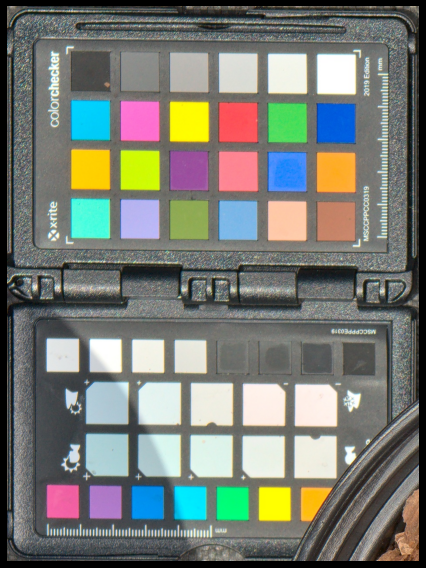

In [8]:

df = allcuts[allcuts["common_name"]=="colorchecker"]
df.to_csv("test.csv")
df["temp_path"] = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts/" + df["cutout_path"].str.replace("png","jpg")
paths = list(df["temp_path"].copy())
kimgs = 1
ncol= 1
nrow= 1
for i in range(0,len(paths)):
    imgps = random.choices(paths, k=kimgs)
    print(len(paths))
    [paths.remove(x) for x in imgps]
    imgs = [trans_cutout(img) for img in imgps]
    display_images(imgs, nrow=nrow, ncol=ncol, show=False, save=False, save_path=f"./assets/colorchecker/colorchecker_{random.randint(0,100000)}.png", figsize=(12,8))

In [9]:
allcuts["temp_path"] = "/home/weedsci/matt/SemiF-AnnotationPipeline/data/semifield-cutouts" + allcuts["cutout_path"]
allcuts["temp_path"].shape

(115686,)

### View Cutouts

## Plot Cutouts per batch and all together

### By batch

In [5]:
from tqdm import tqdm
for batch in tqdm(allcuts.batch_id.unique()):
    bdf = allcuts[allcuts["batch_id"] == batch]
    plot_cutouts(subplot=1,
                 df=bdf,
                 y='common_name',
                 title=batch,
                 figsize=(12, 8),
                 color="RdYlGn",
                 xlabel="Number of cutouts",
                 ylabel='',
                 rotation=0,
                 tick_bottom=True,
                 tick_left=True,
                 text_wrapping=13,
                 save_path=f"{savedir}/{batch}_histogram.png",
                 save=True,
                 show=False)


### All cutouts

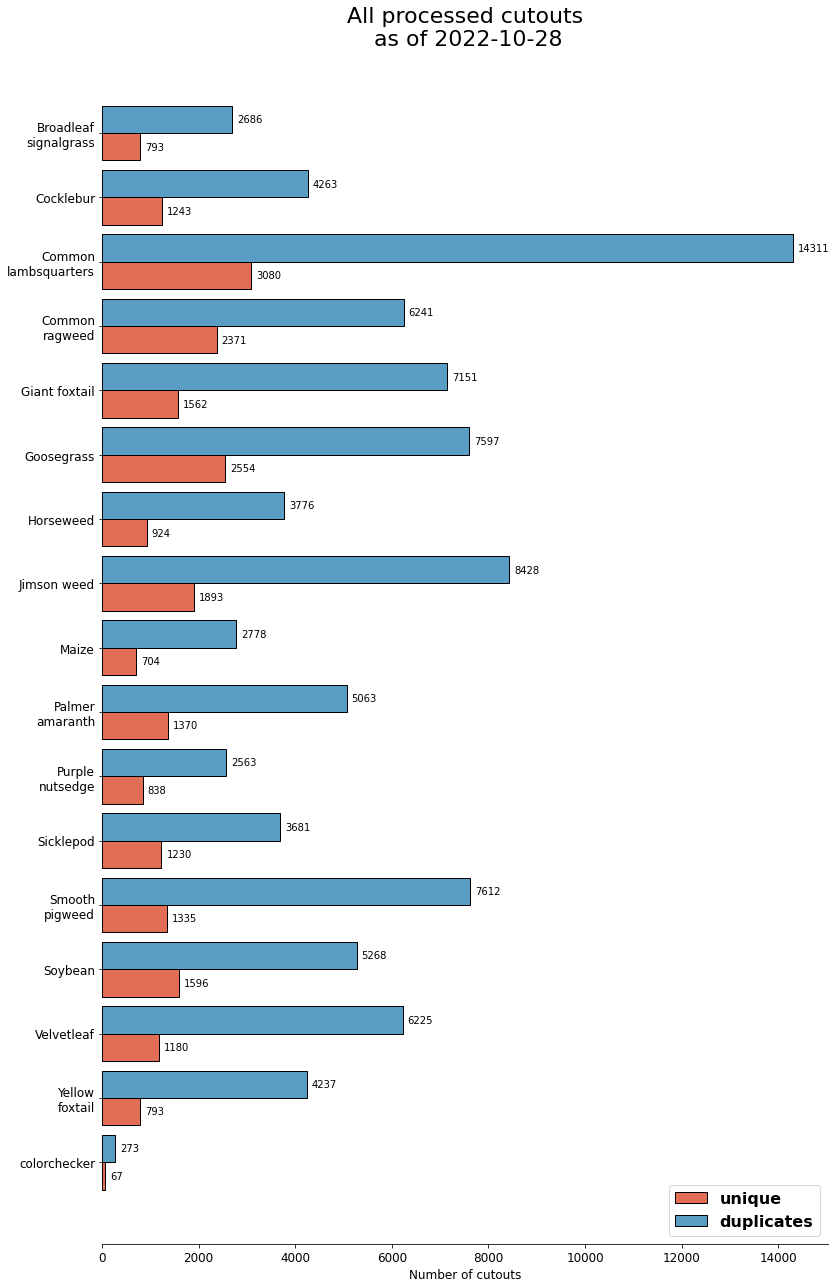

In [10]:
plot_cutouts(subplot=1,
             df=allcuts,
             y='common_name',
             title=f"All processed cutouts\n as of {today}",
             figsize=(22, 18),
             color="viridis",
             xlabel="Number of cutouts",
             ylabel='',
             rotation=0,
             tick_bottom=True,
             tick_left=True,
             text_wrapping=13,
             save_path=f"{savedir}/ALL_cutout_figure.png",
             save=False,
             show=True)


In [11]:
len(allcuts.batch_id.unique())

28

### Summary Statistics

In [12]:
print("Number of Images: ", allcuts["image_id"].nunique())
print(
    "Sum Unique(primary) Cutouts: ",
    sum(allcuts[allcuts["is_primary"] == True].groupby(
        ["common_name"])["image_id"].value_counts()))
print("Total Number of Cutouts: ",
      sum(allcuts.groupby(["common_name"])["cutout_id"].value_counts()))
print()
print("Number of Unique Cutouts:\n",
      allcuts[allcuts["is_primary"] == True].common_name.value_counts())
allcuts.columns


Number of Images:  12339
Sum Unique(primary) Cutouts:  23533
Total Number of Cutouts:  115686

Number of Unique Cutouts:
 Common lambsquarters     3080
Goosegrass               2554
Common ragweed           2371
Jimson weed              1893
Soybean                  1596
Giant foxtail            1562
Palmer amaranth          1370
Smooth pigweed           1335
Cocklebur                1243
Sicklepod                1230
Velvetleaf               1180
Horseweed                 924
Purple nutsedge           838
Yellow foxtail            793
Broadleaf signalgrass     793
Maize                     704
colorchecker               67
Name: common_name, dtype: int64


Index(['blob_home', 'data_root', 'batch_id', 'image_id', 'cutout_num',
       'datetime', 'dap', 'cutout_id', 'cutout_path', 'is_primary',
       'extends_border', 'cutout_version', 'schema_version', 'area',
       'scientific_name', 'common_name', 'USDA_symbol', 'EPPO', 'authority',
       'collection_location', 'polygon_id', 'class_id', 'hex', 'r', 'g', 'b',
       'area_bbox', 'area_convex', 'axis_major_length', 'axis_minor_length',
       'centroid0', 'centroid1', 'eccentricity', 'extent', 'solidity',
       'perimeter', 'is_green', 'green_sum', 'synth', 'temp_path'],
      dtype='object')

In [13]:
sum_unique = sum(allcuts[allcuts["is_primary"] == True].groupby(
    ["common_name"])["image_id"].value_counts())
sum_all = sum(allcuts.groupby(["common_name"])["cutout_id"].value_counts())
costs = {
    "aws sagemaker": {
        "tiers": {
            "tier 1": {
                "units": 1,
                "bbox": 0.036,
                "semantic": 0.84
            }
        },
        "time": {}
    },
    "google cloud": {
        "tiers": {
            "tier 1": {
                "units": 1000,
                "bbox": 63,
                "semantic": 870
            },
            "tier 2": {
                "units": 1000,
                "bbox": 49,
                "semantic": 850
            }
        },
        "time": {}
    },
    "BWI Solutions": {
        "tiers": {
            "tier 1": {
                "units": 1,
                "bbox": 0.085,
                "semantic": 0.125
            },
        },
        "time": {
            "weeks": 2.5,
            "segments": 11000
        },
    }

    # "V7": {
    #     "tiers": {
    #         "tier 1": {
    #             "units": 1,
    #             "bbox": 1,
    #             "semantic": 1
    #         }
    #     }
    # }
}

for company in costs:
    tiers = costs[company]["tiers"]
    time = costs[company]["time"]
    for tier_num in costs[company]["tiers"]:
        pricing = tiers[tier_num]
        units = pricing.get("units")
        print(f"\n{company}")
        print(tier_num)
        print("Units per tier: ", units)
        print("Cost of labeling all bboxes ",
              pricing.get("bbox") * sum_all / units)
        print("Cost of labeling unique bboxes ",
              pricing.get("bbox") * sum_unique / units)
        print("Cost of labeling all segments ",
              pricing.get("semantic") * sum_all / units)
        print("Cost of labeling unique segments ",
              pricing.get("semantic") * sum_unique / units)
        print("time", time)
        if time.get("weeks"):
            print("Estimated time: ")
            print("All cutouts (weeks): ",  time.get("weeks") * sum_all / time.get("segments"))
            print("Unique cutouts (weeks): ",  time.get("weeks") * sum_unique / time.get("segments"))



aws sagemaker
tier 1
Units per tier:  1
Cost of labeling all bboxes  4164.696
Cost of labeling unique bboxes  847.188
Cost of labeling all segments  97176.23999999999
Cost of labeling unique segments  19767.719999999998
time {}

google cloud
tier 1
Units per tier:  1000
Cost of labeling all bboxes  7288.218
Cost of labeling unique bboxes  1482.579
Cost of labeling all segments  100646.82
Cost of labeling unique segments  20473.71
time {}

google cloud
tier 2
Units per tier:  1000
Cost of labeling all bboxes  5668.614
Cost of labeling unique bboxes  1153.117
Cost of labeling all segments  98333.1
Cost of labeling unique segments  20003.05
time {}

BWI Solutions
tier 1
Units per tier:  1
Cost of labeling all bboxes  9833.310000000001
Cost of labeling unique bboxes  2000.305
Cost of labeling all segments  14460.75
Cost of labeling unique segments  2941.625
time {'weeks': 2.5, 'segments': 11000}
Estimated time: 
All cutouts (weeks):  26.292272727272728
Unique cutouts (weeks):  5.348409090

### Feature Stats

In [14]:
feat_col = [
    'batch_id', 'image_id', 'cutout_id', 'common_name', 'collection_location',
    'is_primary', 'extends_border', 'green_sum', 'area', 'area_bbox',
    'area_convex', 'axis_major_length', 'axis_minor_length', 'centroid0',
    'centroid1', 'eccentricity', 'extent', 'solidity', 'perimeter'
]


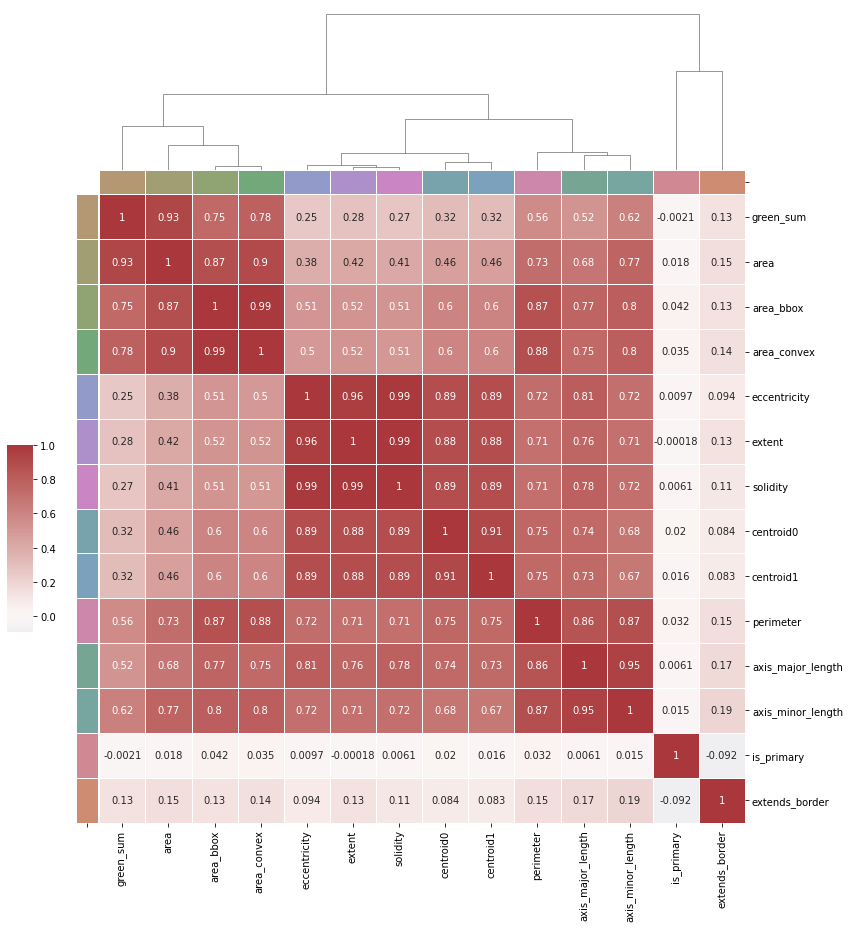

In [5]:
# https://seaborn.pydata.org/examples/structured_heatmap.html
used_features = [
    # 'batch_id', 'image_id','cutout_id',
    # 'common_name','collection_location',
    'is_primary',
    'extends_border',
    'green_sum',
    'area',
    'area_bbox',
    'area_convex',
    'axis_major_length',
    'axis_minor_length',
    'centroid0',
    'centroid1',
    'eccentricity',
    'extent',
    'solidity',
    'perimeter'
]

featdata = allcuts.loc[:, used_features]

# Create a categorical palette to identify the features
feat_pal = sns.husl_palette(len(used_features), s=.45)
feat_lut = dict(zip(map(str, used_features), feat_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
features = featdata.columns
feature_colors = pd.Series(features, index=featdata.columns).map(feat_lut)
# Draw the full plot
g = sns.clustermap(featdata.corr(),
                   center=0,
                   cmap="vlag",
                   annot=True,
                   row_colors=feature_colors,
                   col_colors=feature_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75,
                   figsize=(12, 13))
g.ax_row_dendrogram.remove()

In [38]:
named_featdata = allcuts.loc[:, feat_col]
multfeatdf = named_featdata.groupby(["common_name"]).describe().reset_index()#names=["common_name"])
# print(multfeatdf)
savedir = "/home/weedsci/matt/SemiF-AnnotationPipeline/Assets"
# multfeatdf.to_csv(f"{savedir}/describe_all_cutouts.csv", index=False)
multfeatdf

common_name green_sum                                       \
                              count           mean            std    min   
0   Broadleaf signalgrass    3479.0  275378.806841  451210.618822  101.0   
1               Cocklebur    5506.0  142355.590265  238063.303938  100.0   
2    Common lambsquarters   17391.0  171473.115405  460169.835388  100.0   
3          Common ragweed    8612.0   45120.487343  130357.608116  100.0   
4           Giant foxtail    8713.0  122966.895788  340518.459108  100.0   
5              Goosegrass   10154.0  174145.527181  317201.634096  100.0   
6               Horseweed    4700.0   75796.382340  143330.857973  100.0   
7             Jimson weed   10321.0  311945.238349  892154.580200  100.0   
8                   Maize    3482.0  185899.834865  665650.968237  100.0   
9         Palmer amaranth    6433.0  140494.682885  241452.538235  100.0   
10        Purple nutsedge    3403.0   25152.406700   39300.890626  100.0   
11              Sicklepod    4911.0   71986.996946  145233.403193  100.0   
12         Smooth pigweed    8947.0  313092.872695  958786.823162  100.0   
13                Soybean    6867.0  258675.569535  373345.818381  100.0   
14             Velvetleaf    7405.0  378402.791492  916390.505024  100.0   
15         Yellow foxtail    5030.0  143164.605567  385616.648761  100.0   

                                                  area  ...  solidity  \
         25%       50%        75%         max    count  ...       75%   
0    5334.00   73583.0  373086.50   3865943.0   3479.0  ...  3.105127   
1    8972.25   41063.5  175759.75   2148490.0   5506.0  ...  5.677323   
2     364.00    2475.0  134002.00   7589166.0  17391.0  ...  2.637299   
3     623.00    3510.5   26068.50   1446217.0   8612.0  ...  1.000000   
4     960.00    6194.0   64414.00   5697321.0   8713.0  ...  1.295595   
5    1570.25   24473.5  204263.00   2441476.0  10154.0  ...  2.986382   
6     471.00    2442.0   93195.00   1063092.0   4700.0  ...  1.782626   
7    1439.00    7058.0  113725.00  13814393.0  10321.0  ...  1.851774   
8    1090.00   16779.5   40729.25   9259301.0   3482.0  ...  1.000000   
9    5300.00   36602.0  156553.00   2065108.0   6433.0  ...  3.532405   
10   1055.50    9850.0   29152.00    437540.0   3403.0  ...  3.359021   
11    797.50    7126.0   65108.50   1168961.0   4911.0  ...  1.221360   
12    491.00    3796.0  154485.00  13462717.0   8947.0  ...  3.838051   
13  40606.00  120887.0  301424.00   3079059.0   6867.0  ...  1.284286   
14   3841.00    8912.0  150955.00  13903482.0   7405.0  ...  1.848711   
15    920.00    7125.5  109069.50   4975682.0   5030.0  ...  2.163323   

               perimeter                                                       \
           max     count          mean           std         min          25%   
0    29.502863    3479.0  14006.963975  18025.565567  104.000000  1040.860569   
1    52.815278    5506.0  11013.585062  12707.499131   82.000000  2445.865493   
2    73.561201   17391.0   3717.178713   7183.015263   60.041631   290.303084   
3    83.570845    8612.0   4259.619102  10503.952036   82.000000   352.000000   
4    96.080491    8713.0   5894.791868  16020.312873   59.698485   384.108694   
5   114.980984   10154.0  13810.085328  22351.469859   72.000000   515.352074   
6    15.777935    4700.0   3494.521491   5067.089421   75.355339   291.172619   
7    64.568039   10321.0   5937.907841  14531.365876   55.455844   491.026479   
8    40.952034    3482.0   3441.657774   8689.556719   82.000000   378.000000   
9    55.153408    6433.0   8790.592282  11695.886790  118.000000  1360.212337   
10   19.585772    3403.0   7289.876241   7581.553431   74.000000   928.548863   
11   17.851642    4911.0   8774.181618  15871.001984   76.000000   392.000000   
12  198.573166    8947.0   5559.589458   9684.669900   90.000000   666.964556   
13   45.296007    6867.0   7928.998514  11068.158782  108.000000  1902.954544   
14   76.728725    7405.0   5476.49

## Plot Cutout Description

In [13]:
from pprint import pprint
df = multfeatdf.copy()
df.columns = df.columns.to_flat_index()
df.columns = ['_'.join(x) for x in df.columns.get_level_values(0)]
pprint(df.columns[20:])
# df.head()

Total stats:  97
Number of used stats:  77


/tmp/ipykernel_822450/4213072357.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.clustermap(featdata.corr(),


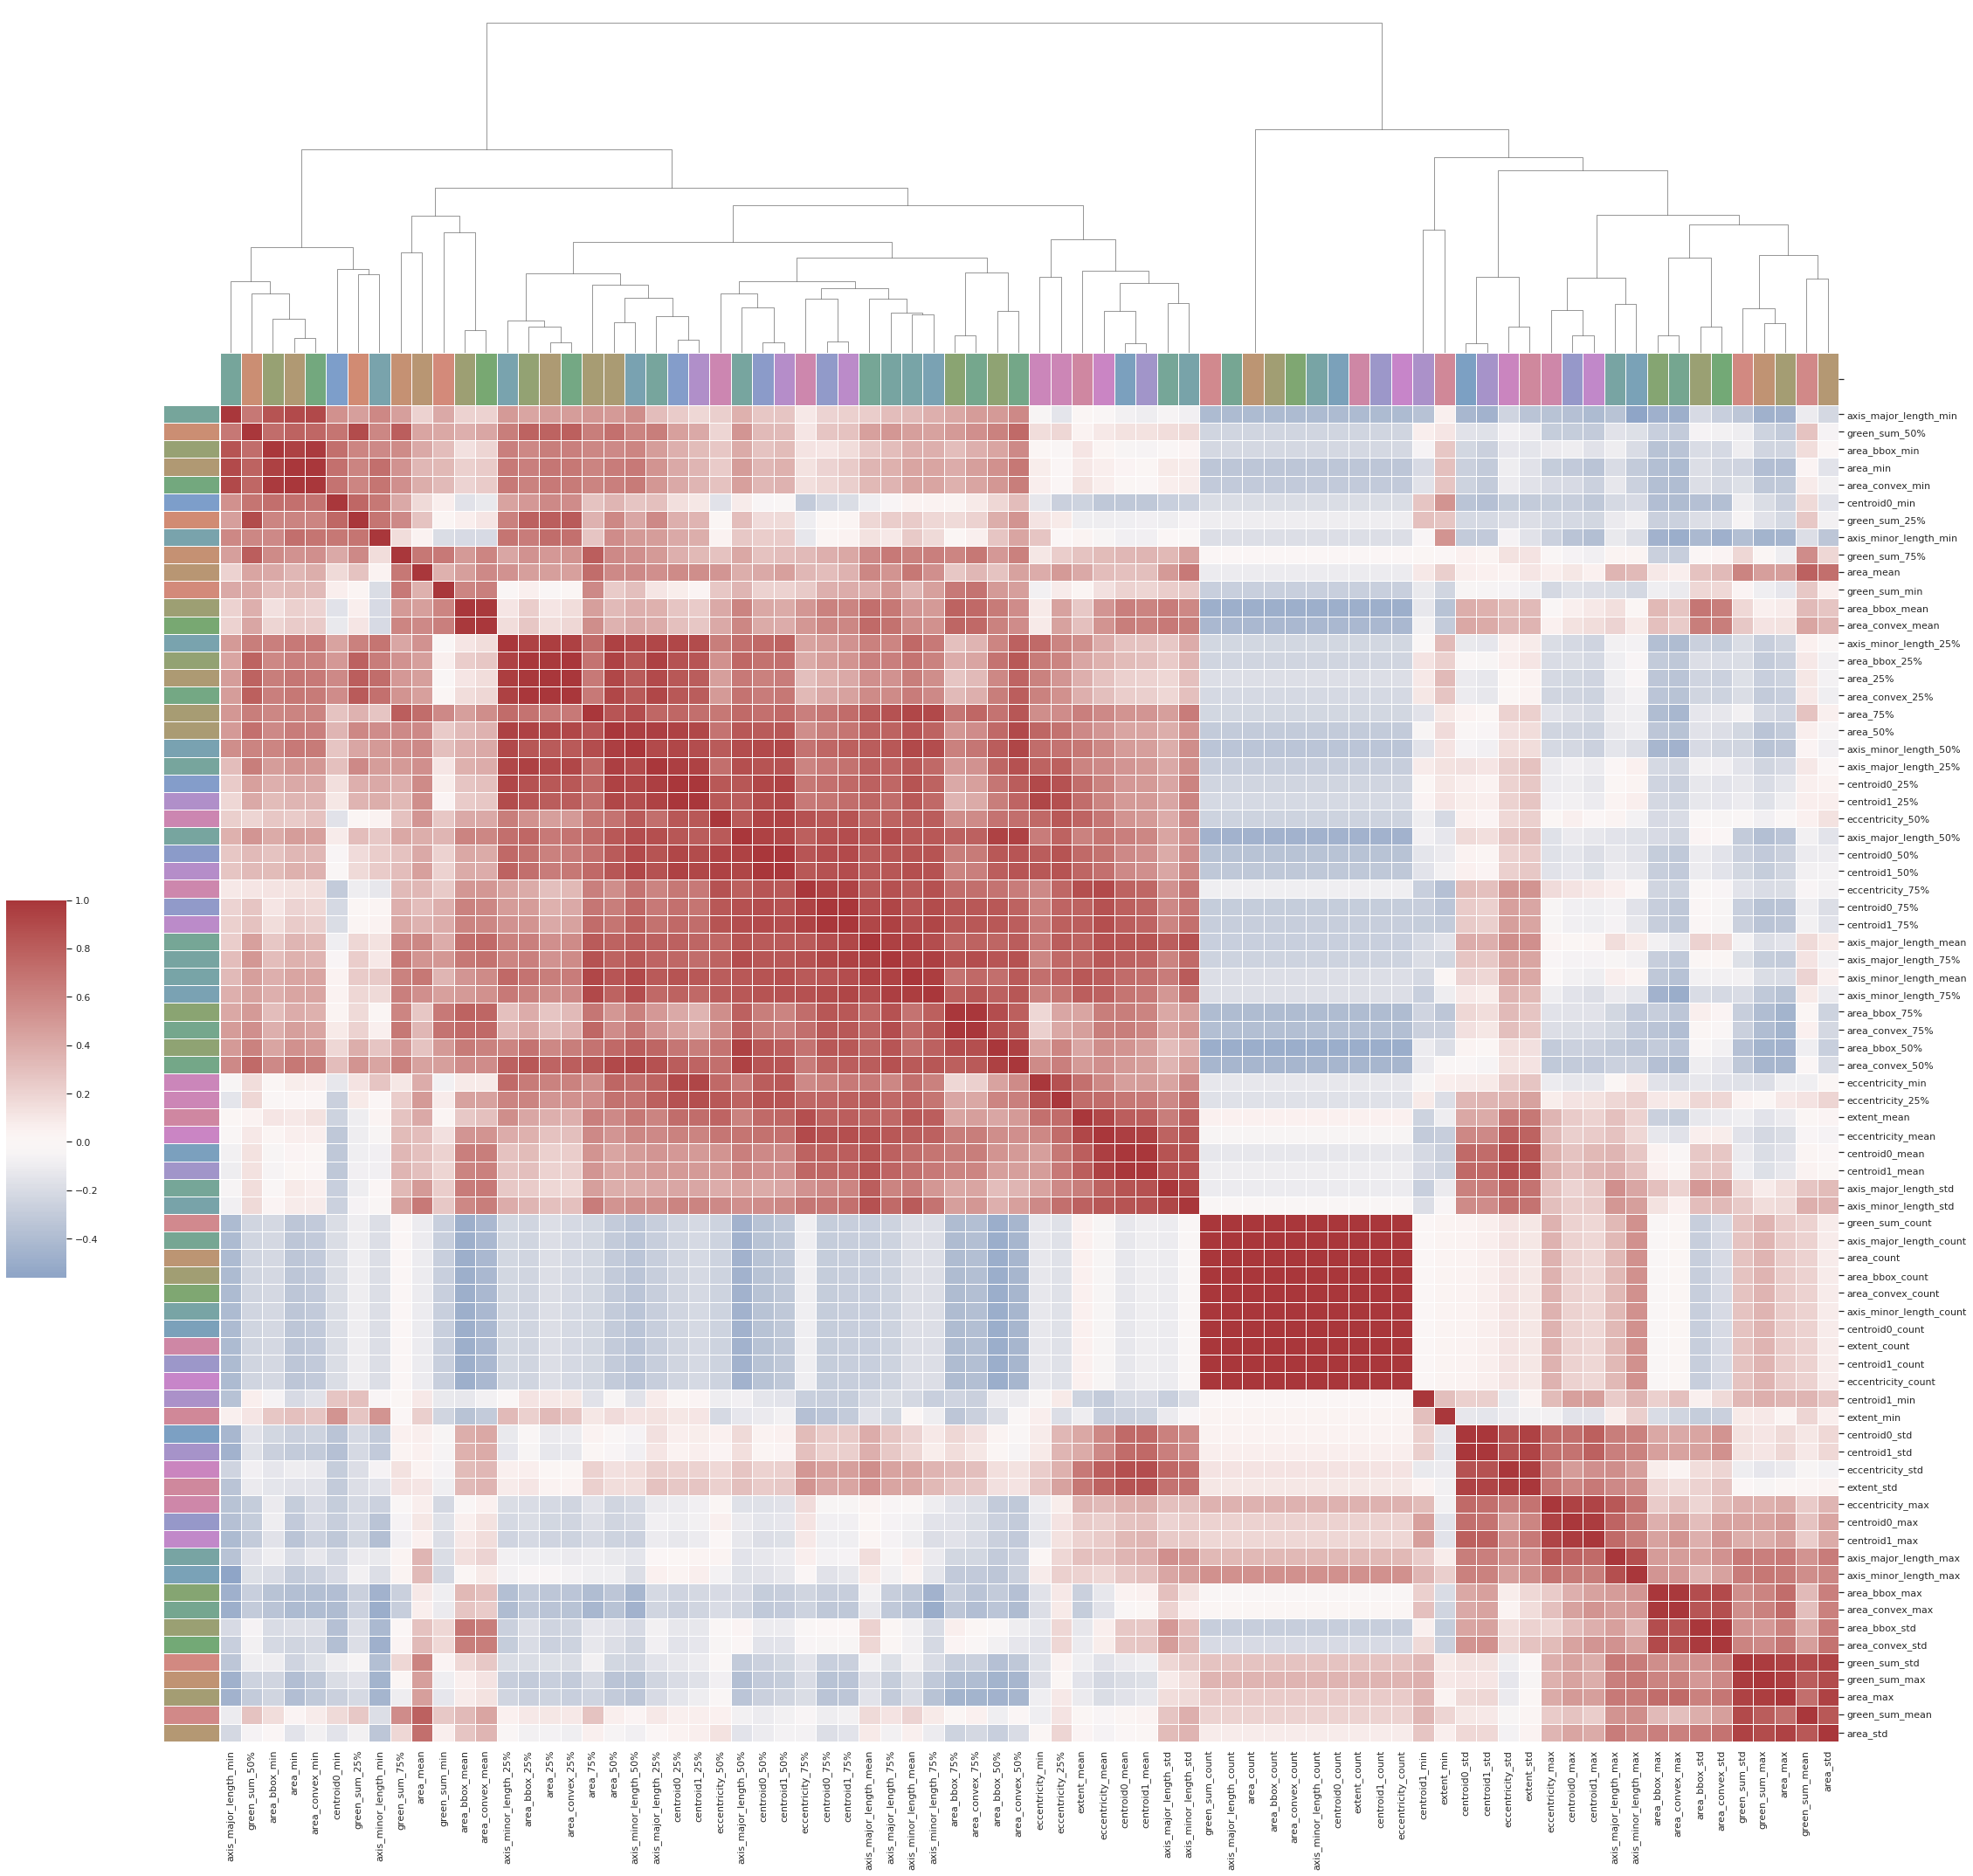

In [37]:
# https://seaborn.pydata.org/examples/structured_heatmap.html
print("Total stats: ",len(df.columns))
used_features = df.columns[:-20]
print("Number of used stats: ", len(used_features))
featdata = df.loc[:, used_features]

# Create a categorical palette to identify the features
feat_pal = sns.husl_palette(len(used_features), s=.45)
feat_lut = dict(zip(map(str, used_features), feat_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
features = featdata.columns
feature_colors = pd.Series(features, index=featdata.columns).map(feat_lut)
# Draw the full plot
sns.set(font_scale=1.)
g = sns.clustermap(featdata.corr(),
                   center=0,
                   cmap="vlag",
                   annot=False,
                   row_colors=feature_colors,
                   col_colors=feature_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75,
                   figsize=(32, 30))
g.ax_row_dendrogram.remove()

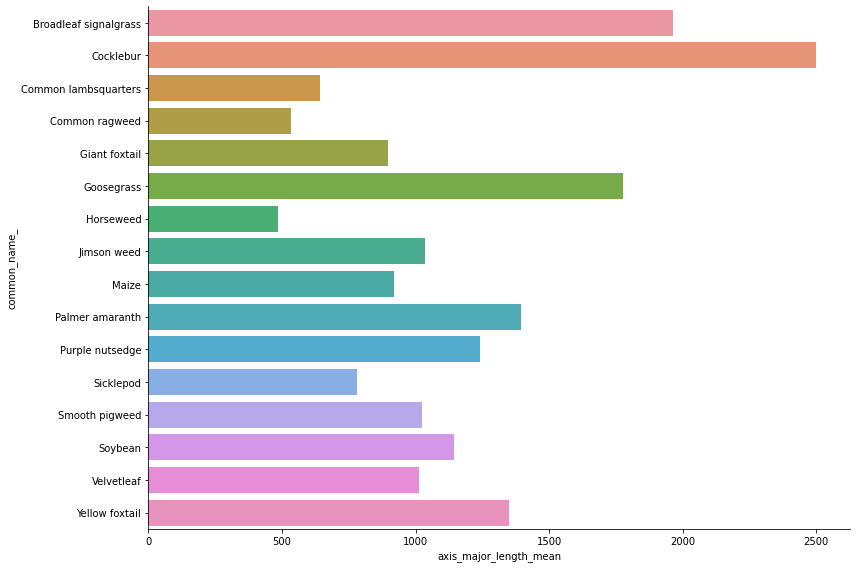

In [8]:
# data = pd.DataFrame(data={'val': values}, index=index).reset_index()
sns.catplot(
    data=df, x="axis_major_length_mean", y="common_name_",height=8, aspect=1.5,
    kind="bar")

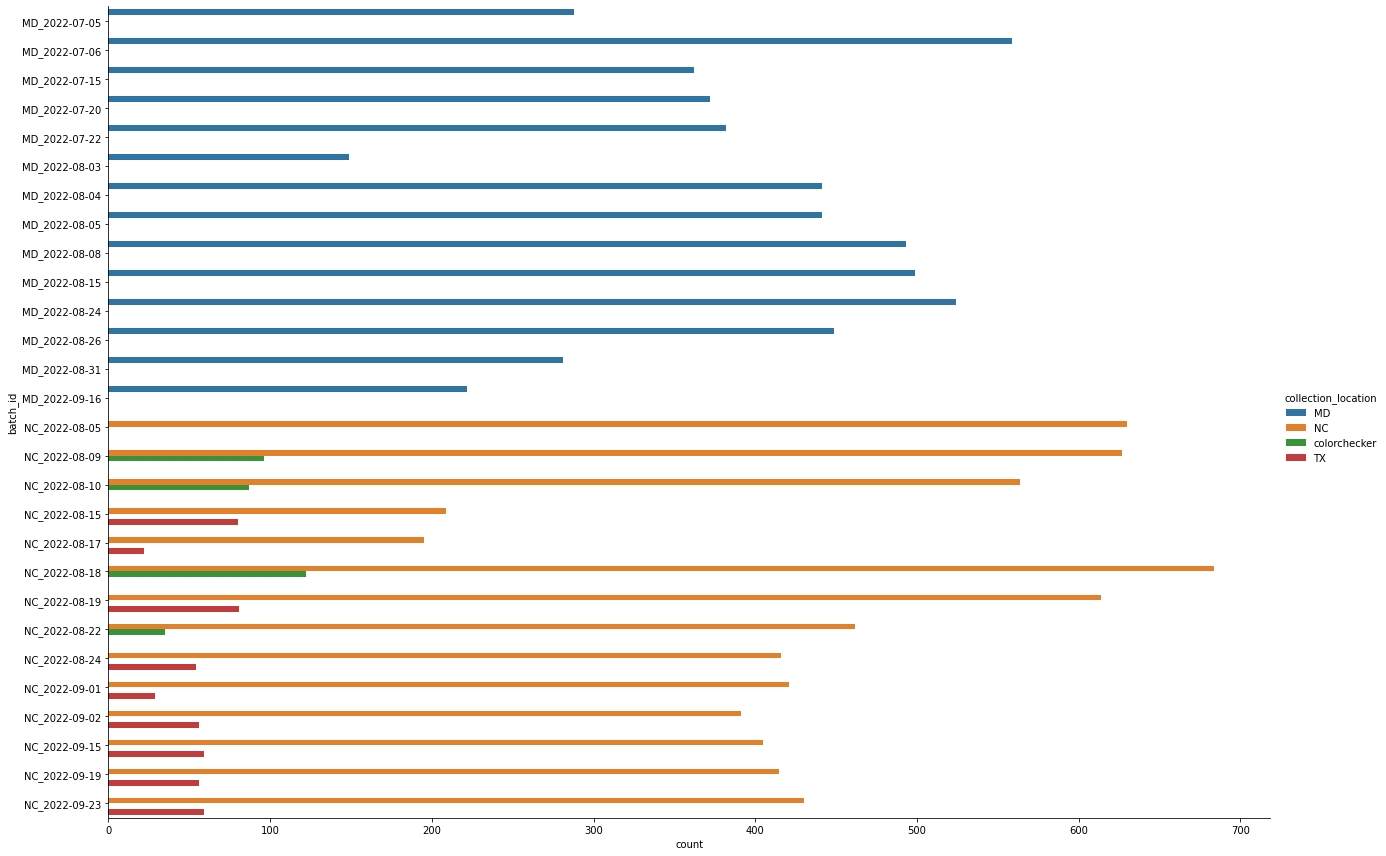

In [15]:
# data = pd.DataFrame(data={'val': values}, index=index).reset_index()

imgs = allcuts.groupby(["batch_id", "image_id","collection_location"]).nunique().reset_index()
# allcuts["image_id"].unique()
df = imgs.copy()
df.columns = df.columns.to_flat_index()
# df.columns = ['_'.join(x) for x in df.columns.get_level_values(0)]
# pprint(df.columns[20:])
df.head()
# imgs
df["collection_location"]
sns.catplot(
    data=df, y="batch_id",height=12, aspect=1.5,hue="collection_location",
    kind="count")